In [1]:
import os
import pandas as pd

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [2]:
from matplotlib import pyplot as plt
from skimage import measure, morphology
import pydicom as dicom
import numpy as np
import cv2
import skimage.transform

X=np.load('data_X.npy')
y=np.load('data_y.npy')

In [3]:
print(X.shape)
print(y.shape)

(1546, 224, 224, 3)
(1546, 3)


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

Using TensorFlow backend.


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 8)       2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 8)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                6195264   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 6,198,667
Trainable params: 6,198,667
Non-trainable params: 0
____________________________________________

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# 모델 학습시키기
#train
history=model.fit(
    X,
    y,
    batch_size=32,
    epochs=30,
    validation_split=0.2)

Train on 1236 samples, validate on 310 samples
Epoch 1/30
1236/1236 [==============================] - 22s 18ms/step - loss: 1.4907 - accuracy: 0.3608 - val_loss: 1.1024 - val_accuracy: 0.2935
Epoch 2/30
1236/1236 [==============================] - 17s 14ms/step - loss: 1.0703 - accuracy: 0.4264 - val_loss: 1.0785 - val_accuracy: 0.4323
Epoch 3/30
1236/1236 [==============================] - 22s 18ms/step - loss: 0.8727 - accuracy: 0.6432 - val_loss: 1.1527 - val_accuracy: 0.3742
Epoch 4/30
1236/1236 [==============================] - 21s 17ms/step - loss: 0.5164 - accuracy: 0.8074 - val_loss: 1.2297 - val_accuracy: 0.4452
Epoch 5/30
1236/1236 [==============================] - 14s 11ms/step - loss: 0.2951 - accuracy: 0.9102 - val_loss: 1.4954 - val_accuracy: 0.3903
Epoch 6/30
1236/1236 [==============================] - 12s 10ms/step - loss: 0.1896 - accuracy: 0.9353 - val_loss: 1.9691 - val_accuracy: 0.3581
Epoch 7/30
1236/1236 [==============================] - 12s 10ms/step - loss:

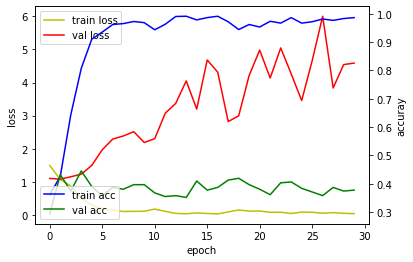

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')

In [10]:
# 성능 측정
loss,metrics = model.evaluate(X_test,y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print("loss :",loss)
print("accuracy :", metrics)

326/326 [==============================] - 2s 5ms/step
## evaluation loss and_metrics ##
loss : 5824.073080425614
accuracy : 0.3711656332015991
